# Classic Models - V.01.0 <a id='home '></a>

Modelos de dados de loja de venda de modelos de veículos (carros antigos, trens, etc) em escala

## Introdução

### Modelo de dados <a class='anchor' id='modelo-de-dados'/>

<img src='./../../docs/imgs/classicmodels.png' />

## Imports <a class='anchor' id='imports'/>

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine,text
from sqlalchemy.engine.url import URL
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Configurações

In [2]:
# Seaborn style

DARKGRID = "darkgrid"
WHITEGRID = "whitegrid"

sns.set_style(DARKGRID)

# sns.set_theme(style="whitegrid")



# Databse
usuario = 'root'
senha = 'secret'

engine = create_engine(URL(
    drivername = 'mysql+pymysql',
    username = usuario,
    password = senha,
    
    host = 'localhost',
    query = {'charset': 'utf8'},
    port = 3306, 
    database='classicmodels'
))

conn = engine.connect()

### Obter tabelas <a class='anchor' id='obter-tabelas' />

In [3]:
q = text('show tables')
tables = pd.read_sql(q, conn)

for table in tables.values:
    print(f'Detalhes da tabela: {table[0]}\n')
    q = text(f'show columns from {table[0]}')
    print(pd.read_sql(q, conn))
    print('\n= = = = = = = = = = = = = = = = = = = = = = = = = = ')

Detalhes da tabela: customers

                     Field           Type Null  Key Default Extra
0           customerNumber            int   NO  PRI    None      
1             customerName    varchar(50)   NO         None      
2          contactLastName    varchar(50)   NO         None      
3         contactFirstName    varchar(50)   NO         None      
4                    phone    varchar(50)   NO         None      
5             addressLine1    varchar(50)   NO         None      
6             addressLine2    varchar(50)  YES         None      
7                     city    varchar(50)   NO         None      
8                    state    varchar(50)  YES         None      
9               postalCode    varchar(15)  YES         None      
10                 country    varchar(50)   NO         None      
11  salesRepEmployeeNumber            int  YES  MUL    None      
12             creditLimit  decimal(10,2)  YES         None      

= = = = = = = = = = = = = = = = = = = = = = 

### Consulta de clientes (10) e presentação dos 5  resultados <a id='consulta-clientes'></a>

In [4]:
q = text('select * from customers limit 10')
pd.read_sql(q, conn).head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0


### Contagem de clientes por país ordenado pela quantidade, mostrando primeiros 5 resultados <a id='contagem-clientes'></a>

In [5]:
q = text('''
select count(customerNumber) as qty_customers, country 
    from customers 
    group by country 
    order by count(customerNumber) desc
''')
                  
pd.read_sql(q, conn).head()

,qty_customers,country
0,36,USA
1,13,Germany
2,12,France
3,7,Spain
4,5,UK


## Consulta similar à anterior, porém a contagem é tratado na instância do pandas

In [6]:
q = text('''
select country, count(country) as qty_customers 
         from customers 
         group by country 
         order by qty_customers DESC
''')

customers_by_country = pd.read_sql(q, conn).head(10)

fig = px.bar(customers_by_country, x='country', y='qty_customers', \
            title='TOP 10 - Customers by Country', color='qty_customers', \
            labels={'country': 'Country', 'qty_customers': 'Quantity Customers'})
fig.show() 


## Recuperação das categorias (products lines)

In [7]:
q = text('select * from productlines')
productlines = pd.read_sql(q, conn)
productlines

,productLine,textDescription,htmlDescription,image
0,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
1,Motorcycles,Our motorcycles are state of the art replicas ...,None,None
2,Planes,"Unique, diecast airplane and helicopter replic...",None,None
3,Ships,The perfect holiday or anniversary gift for ex...,None,None
4,Trains,Model trains are a rewarding hobby for enthusi...,None,None
5,Trucks and Buses,The Truck and Bus models are realistic replica...,None,None
6,Vintage Cars,Our Vintage Car models realistically portray a...,None,None


## Seleção de quantidade de produtos por categoria ornadenados na camada pandas pelas que tem mais produtos 

In [8]:
q = text('''
select a.productLine as product_line, 
    a.textDescription as description, 
    count(b.productCode) as qty_prd
    from productlines a 
    inner join products b on a.productLine = b.productLine 
    group by a.productLine
''')
productlines = pd.read_sql(q, conn)
productlines.sort_values(by='qty_prd', ascending=False)

,product_line,description,qty_prd
0,Classic Cars,Attention car enthusiasts: Make your wildest c...,38
6,Vintage Cars,Our Vintage Car models realistically portray a...,24
1,Motorcycles,Our motorcycles are state of the art replicas ...,13
2,Planes,"Unique, diecast airplane and helicopter replic...",12
5,Trucks and Buses,The Truck and Bus models are realistic replica...,11
3,Ships,The perfect holiday or anniversary gift for ex...,9
4,Trains,Model trains are a rewarding hobby for enthusi...,3


In [9]:
q = text('''
select productCode as code,  
    productName as name,
    productLine as product_line
    from products
''')

products = pd.read_sql(q, conn)
products.head()

,code,name,product_line
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles
1,S10_1949,1952 Alpine Renault 1300,Classic Cars
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars


## Consulta de quantidade de produtos por categoria realizada apenas na camada pandas

In [10]:
productlines[['product_line', 'description']].merge(products[['code','product_line']], \
    how='inner', on='product_line')[['product_line', 'code']].groupby('product_line').count()



,code
product_line,
Classic Cars,38
Motorcycles,13
Planes,12
Ships,9
Trains,3
Trucks and Buses,11
Vintage Cars,24


### Melhor alternativa

In [11]:
result_temp = products.groupby('product_line').size().reset_index().rename(columns={0: 'qty_prd'})

fig = px.bar(result_temp.sort_values(by='qty_prd', ascending=False), \
            x='product_line', y='qty_prd', \
            title='Quantity Products by Category', \
            labels={'product_line': 'Category','qty_prd': 'Quantity Products'})
fig.show()

## Seleção de categorias com descrição e quantide de produtos em cada uma delas

In [12]:
result_tmp = productlines[['product_line', 'description']] \
    .merge(products[['code','product_line']], how='inner', on='product_line') \
    [['product_line', 'code']].groupby('product_line').count() \
    .merge(productlines[['product_line', 'description']], how='inner', on='product_line')

# Melhora nos cabeçalhos
result_tmp.columns = ['Product Line', 'Qty Prods', 'Description']
result_tmp

,Product Line,Qty Prods,Description
0,Classic Cars,38,Attention car enthusiasts: Make your wildest c...
1,Motorcycles,13,Our motorcycles are state of the art replicas ...
2,Planes,12,"Unique, diecast airplane and helicopter replic..."
3,Ships,9,The perfect holiday or anniversary gift for ex...
4,Trains,3,Model trains are a rewarding hobby for enthusi...
5,Trucks and Buses,11,The Truck and Bus models are realistic replica...
6,Vintage Cars,24,Our Vintage Car models realistically portray a...


### Alternativa

In [13]:
result_tmp = pd.DataFrame(productlines[['product_line', 'description']] \
    .merge(products[['code','product_line']], how='inner', on='product_line') \
    .groupby(['product_line', 'description'])['product_line'].count())

# Melhora nos cabeçalhos e exclusão dos índices
result_tmp.columns = ['Qty Prods']
result_tmp.reset_index(inplace=True)
result_tmp.columns = ['Description', 'Product Line', 'Qty Prods']

result_tmp

,Description,Product Line,Qty Prods
0,Classic Cars,Attention car enthusiasts: Make your wildest c...,38
1,Motorcycles,Our motorcycles are state of the art replicas ...,13
2,Planes,"Unique, diecast airplane and helicopter replic...",12
3,Ships,The perfect holiday or anniversary gift for ex...,9
4,Trains,Model trains are a rewarding hobby for enthusi...,3
5,Trucks and Buses,The Truck and Bus models are realistic replica...,11
6,Vintage Cars,Our Vintage Car models realistically portray a...,24


### Seleção de pedidos por cliente (por valores) <a id='pedidos-por-cliente'></a>

In [14]:
q = text('''
SELECT 
	c.customerName as customer_name, 
	o.orderNumber as order_number,
	sum(o2.quantityOrdered * o2.priceEach) as total_order
	from orders o 
	join orderdetails o2 on o2.orderNumber = o.orderNumber 
	join customers c on c.customerNumber = o.customerNumber 
	where status='Shipped'
	GROUP by (o.orderNumber)
	order by c.customerNumber
''')
orders_by_customer = pd.read_sql_query(q, conn)
orders_by_customer.head()

,customer_name,order_number,total_order
0,Atelier graphique,10123,14571.44
1,Atelier graphique,10298,6066.78
2,Atelier graphique,10345,1676.14
3,Signal Gift Stores,10124,32641.98
4,Signal Gift Stores,10278,33347.88


### Dados agregados (média, total, min e max) ordenados maior volume de vendas

In [15]:
result_temp = orders_by_customer.groupby('customer_name')['total_order'] \
    .agg(['sum', 'mean', 'min', 'max']) \
    .sort_values(by='sum', ascending=False).head(10)

result_temp

,sum,mean,min,max
customer_name,,,,
Euro+ Shopping Channel,668770.46,30398.657273,4599.52,59830.55
Mini Gifts Distributors Ltd.,584188.24,36511.765000,4466.71,56052.56
"Australian Collectors, Co.",180585.07,36117.014000,7565.08,45864.03
Muscle Machine Inc,177913.95,44478.487500,20314.44,58841.35
"Dragon Souveniers, Ltd.",156251.03,31250.206000,2611.84,67392.85
"Down Under Souveniers, Inc",154622.08,30924.416000,2880.00,41426.81
"AV Stores, Co.",148410.09,49470.030000,47159.11,52825.29
Salzburg Collectables,137480.07,34370.017500,6419.84,52420.07
"Anna's Decorations, Ltd",137034.22,34258.555000,27083.78,41554.73


In [16]:
# Necessário redefinir o índice
result_temp.reset_index(inplace=True)

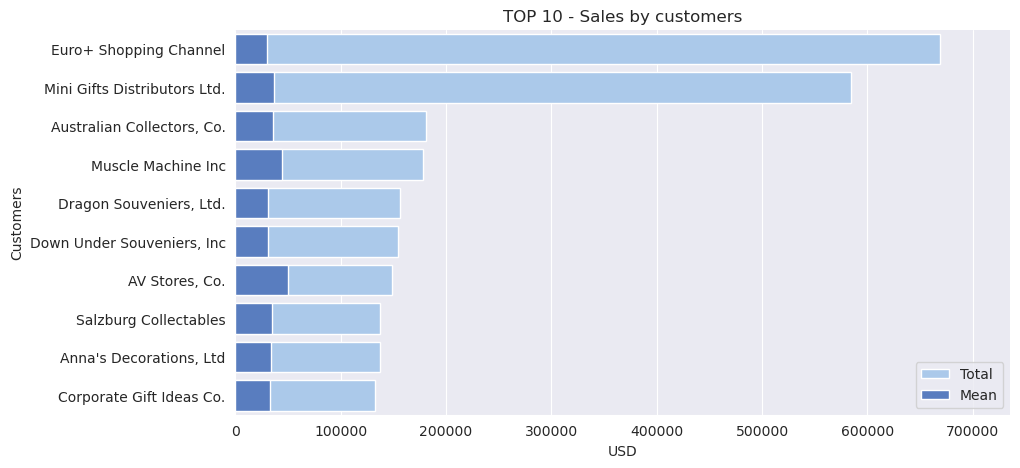

In [17]:

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title('TOP 10 - Sales by customers')

# Plot the total sales
sns.set_color_codes("pastel")
sns.barplot(x="sum", y="customer_name", data=result_temp,
            label="Total", color="b")

# Plot the mean sales
sns.set_color_codes("muted")
sns.barplot(x="mean", y="customer_name", data=result_temp,
            label="Mean", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, int(result_temp['sum'].max()*1.1)), ylabel="Customers",
       xlabel="USD")

sns.despine(left=True, bottom=False)
plt.show()

In [18]:
# normalizar valores

totals = result_temp['sum'].values/np.sum(result_temp['sum'].values)
means = result_temp['mean'].values/np.sum(result_temp['mean'].values)


In [19]:
# Plotly 
px.bar(result_temp, x=result_temp.index, y='sum', \
    title='TOP 10 - Best customers', \
    labels={'sum': 'Total Sales (USD)', 'customer_name': 'Customers'})

### Carga de pedidos contendo, para cada dia, a quantidade de pedidos e o volume de vendas (USD) <a id='pedidos-por-dia'></a>
[Início](#home)

In [20]:
q = text('''
-- orders by date, with orders quantity and total ammount 
select o.orderDate, count(o.orderNumber) as qtyOrders, 
	sum(o2.priceEach * o2.quantityOrdered) as totalOrder
	from orders o 
	join orderdetails o2 on o2.orderNumber = o.orderNumber 
	GROUP by o.orderDate
''')

evolution = pd.read_sql(q, conn)
display(evolution.shape, evolution.head())

(265, 3)

,orderDate,qtyOrders,totalOrder
0,2003-01-06,4,10223.83
1,2003-01-09,4,10549.01
2,2003-01-10,2,5494.78
3,2003-01-29,16,50218.95
4,2003-01-31,13,40206.20


### Pedidos por periodo. <a id='plotline-por-periodo'></a>

In [21]:
# Load data
q = text('''
-- by order date
select o.orderDate, sum(o2.priceEach * o2.quantityOrdered) as totalOrder
	from orders o 
	join orderdetails o2 on o2.orderNumber = o.orderNumber 
	GROUP by o.orderDate 
''')

evolution = pd.read_sql(q, conn)

In [22]:
# Cast dates and aggregate in periods (year/month)
evolution['orderDate'] = pd.to_datetime(evolution.orderDate)
evolution['period']= evolution['orderDate'].dt.to_period("M").astype('str')
display(evolution.shape, evolution.head())

(265, 3)

,orderDate,totalOrder,period
0,2003-01-06,10223.83,2003-01
1,2003-01-09,10549.01,2003-01
2,2003-01-10,5494.78,2003-01
3,2003-01-29,50218.95,2003-01
4,2003-01-31,40206.20,2003-01


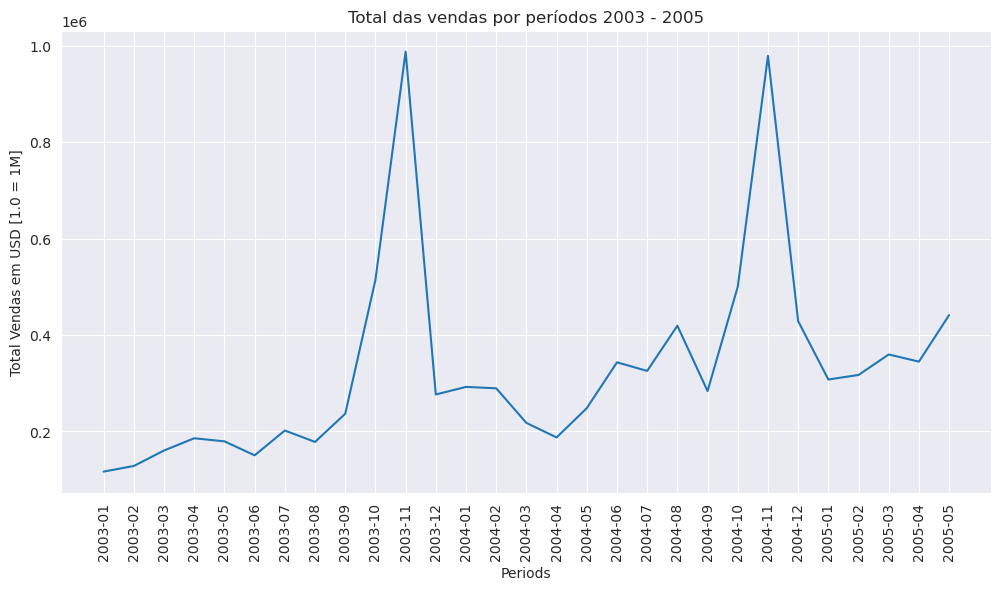

In [23]:
# Aggregate by period
evolution_by_period = evolution.groupby('period')['totalOrder'].agg(['sum', 'mean', 'median']).reset_index()

# Build chart by period
plt.figure(figsize=(12,6))
sns.lineplot(data=evolution_by_period, x='period', y='sum')
plt.title('Total das vendas por períodos 2003 - 2005')
plt.xlabel('Periods')
plt.ylabel("Total Vendas em USD [1.0 = 1M]")
plt.axes
plt.xticks(rotation=90)
plt.show()

> É possível observer que existem picos nos meses de novembro, dos anos contidos na amostra. Imaginamos, sem ter mais informações, que as promoções de _black friday_ impactam positivamente nas vendas